In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [8]:
class BoxModel():
    def __init__(self,epsilon,eta=2.04,lambda_eq=-1.27):
        F=3.8
        C=12
        CD=244

        b1=(lambda_eq-epsilon*eta)/C
        b2=(epsilon*eta)/C

        b3=eta/CD
        b4=-eta/CD

        alpha_f=(b1+b4)/2*(1+np.sqrt(1-4*(b1*b4-b2*b3)/(b1+b4)**2))
        alpha_s=(b1+b4)/2*(1-np.sqrt(1-4*(b1*b4-b2*b3)/(b1+b4)**2))

        tau_f=-1/alpha_f
        tau_s=-1/alpha_s

        xi_f=(alpha_f-b1)/b2
        xi_s=(alpha_s-b1)/b2

        psi_f=(F/lambda_eq *(1-xi_s))/(xi_f-xi_s)
        psi_s=(F/lambda_eq*(1-xi_f))/(xi_s-xi_f)

        t=np.arange(0,1000,.2)
        T=F/(-lambda_eq ) + psi_f*np.exp(-t/tau_f) + psi_s*np.exp(-t/tau_s)
        TD=F/(-lambda_eq ) + xi_f*psi_f*np.exp(-t/tau_f) + xi_s*psi_s*np.exp(-t/tau_s)
        
        self.T=T
        self.TD=TD
        self.t=t
        self.lambda_eq=lambda_eq
        self.epsilon=epsilon
        self.eta=eta
        self.F=F
        self.N = F + lambda_eq*T-(self.epsilon-1)*self.eta*(T-TD)
        self.lambda_inferred= (self.N-self.F)/self.T
    


In [10]:
unit_efficacy=BoxModel(1)
high_efficacy=BoxModel(2)
low_efficacy=BoxModel(.5)

/Users/kmarvel/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:37: RuntimeWarning: invalid value encountered in divide
/Users/kmarvel/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:37: RuntimeWarning: divide by zero encountered in divide


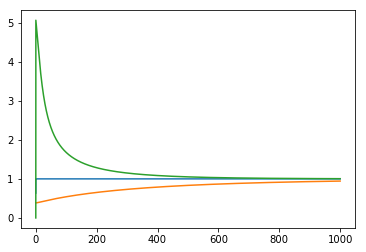

In [14]:
t=unit_efficacy.t
plt.plot(t,unit_efficacy.lambda_eq/unit_efficacy.lambda_inferred)
plt.plot(t,high_efficacy.lambda_eq/high_efficacy.lambda_inferred)
plt.plot(t,low_efficacy.lambda_eq/low_efficacy.lambda_inferred)